# TASK-3: IRIS FLOWER CLASSIFICATION
AUTHOR: MOULI KAYAL

INTERNSHIP DURATION : 25 SEPTEMBER 2024 - 25 OCTOBER 2024

BATCH: SEPTEMBER BATCH A78

DOMAIN: DATA SCIENCE

AIM: TO DEVELOP A MODEL THAT CAN CLASSIFY IRIS FLOWERS INTO DIFFERENT SPECIES BASED ON THEIR SEPAL AND PETAL MEASUREMENTS.

IMPORTING IMPORTANT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


DOWNLOADING DATASETS

In [ ]:
iris_data=pd.read_csv('/content/IRIS.csv')
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
iris_data.shape

(150, 5)

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris_data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


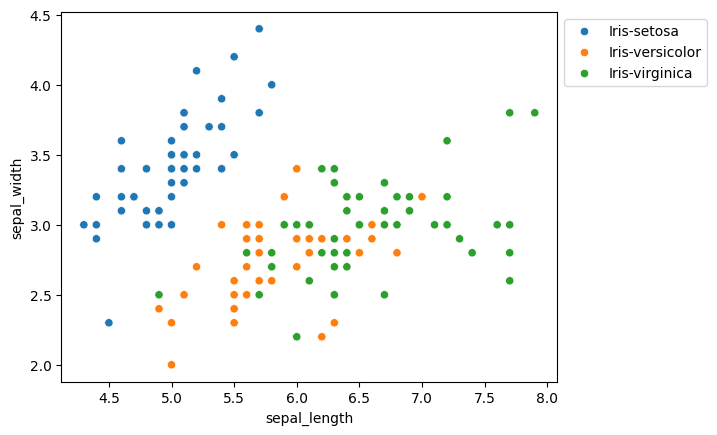

In [ ]:
sns.scatterplot(x="sepal_length",y="sepal_width",hue="species",data=iris_data)
plt.legend(bbox_to_anchor=(1,1),loc=2)

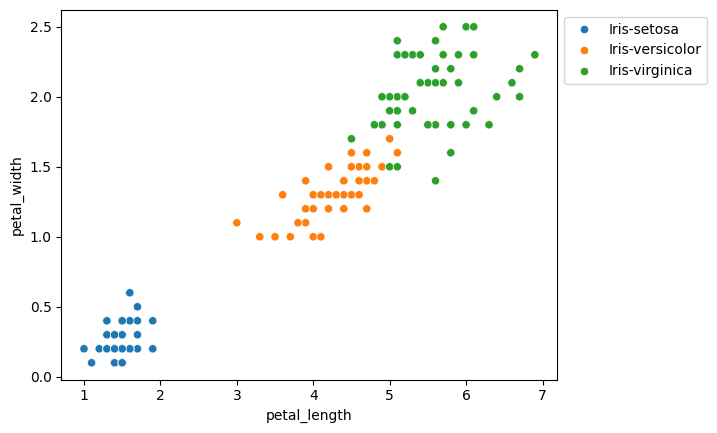

In [ ]:
sns.scatterplot(x="petal_length",y="petal_width",hue="species",data=iris_data)
plt.legend(bbox_to_anchor=(1,1),loc=2)

In [ ]:
iris_data['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


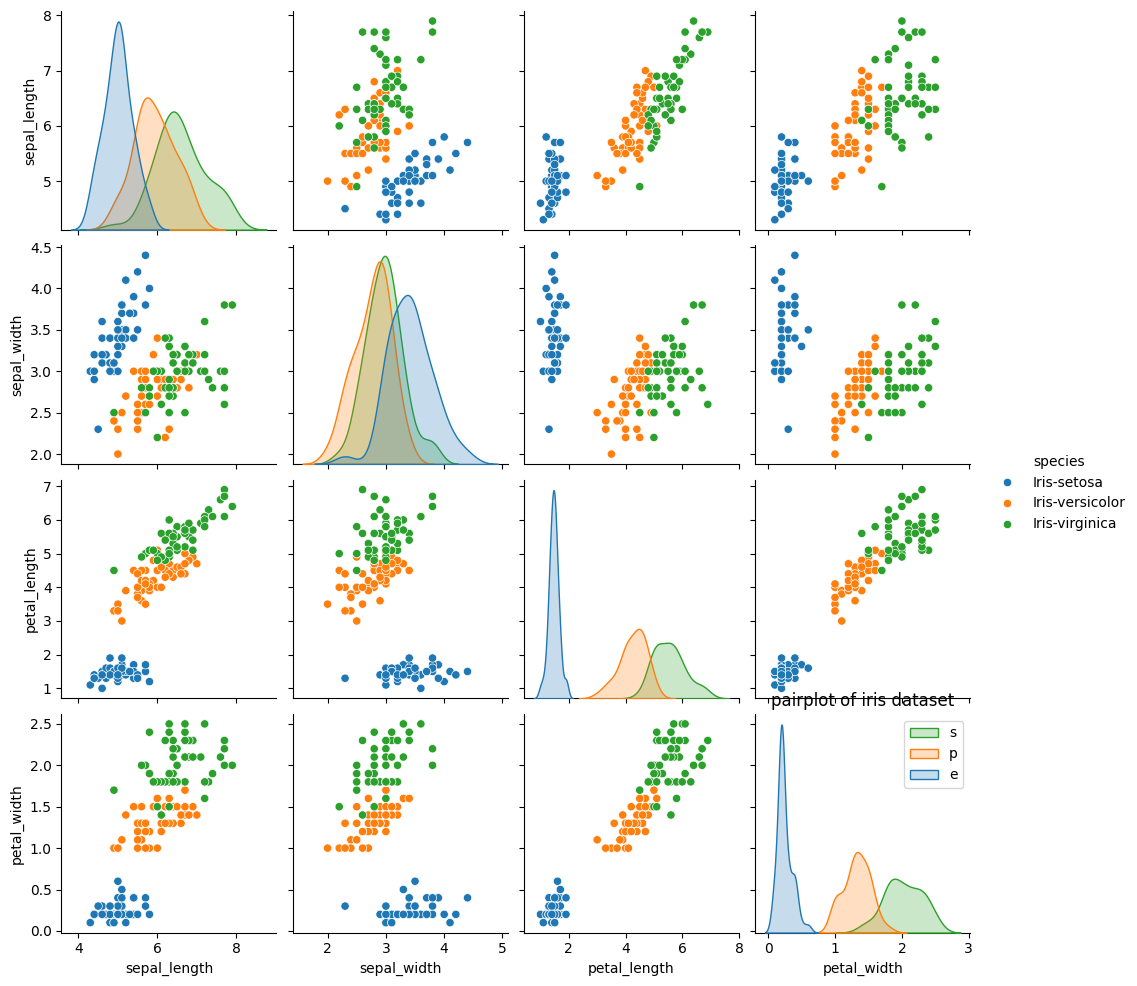

In [ ]:
sns.pairplot(iris_data,hue="species",diag_kind="kde")
plt.title("pairplot of iris dataset")
plt.legend("species")

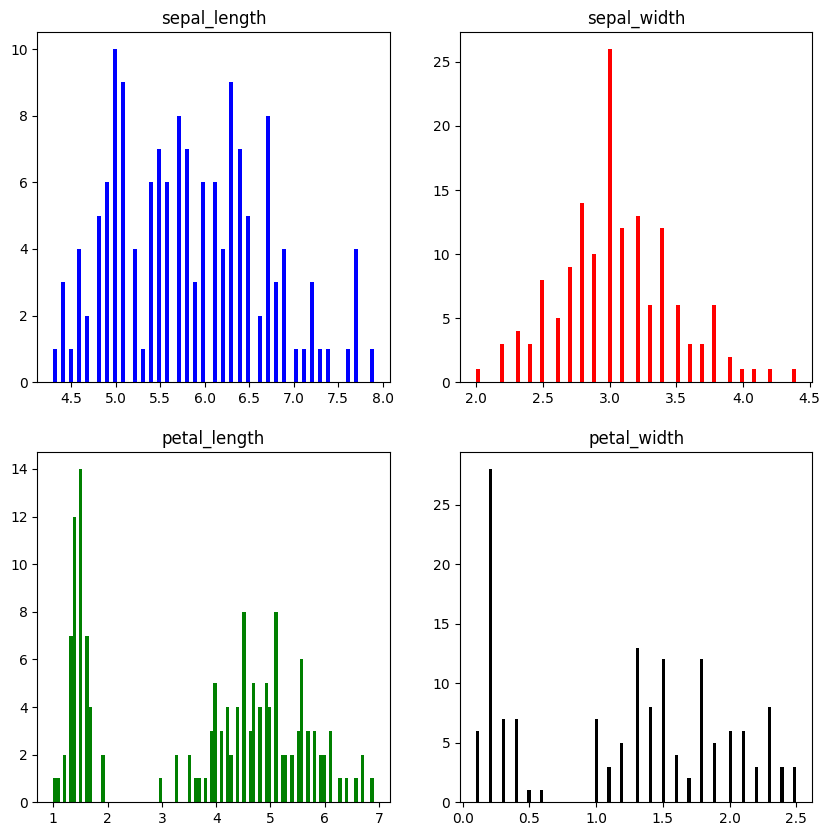

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].set_title('sepal_length')
ax[0,0].hist(iris_data['sepal_length'],bins=80,color='blue')
ax[0,1].set_title('sepal_width')
ax[0,1].hist(iris_data['sepal_width'],bins=80,color='red')
ax[1,0].set_title('petal_length')
ax[1,0].hist(iris_data['petal_length'],bins=100,color='green')
ax[1,1].set_title('petal_width')
ax[1,1].hist(iris_data['petal_width'],bins=100,color='black')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
def graph(y):
  sns.boxplot(x=iris_data['species'],y=iris_data[y])
  plt.title(y)
  plt.figure(figsize=(10,10))

  plt.subplot(221)
  graph('sepal_length')

  plt.subplot(222)
  graph('sepal_width')

  plt.subplot(223)
  graph('petal_length')

  plt.subplot(224)
  graph('petal_width')

  plt.tight_layout()

  plt.show()

<Axes: >

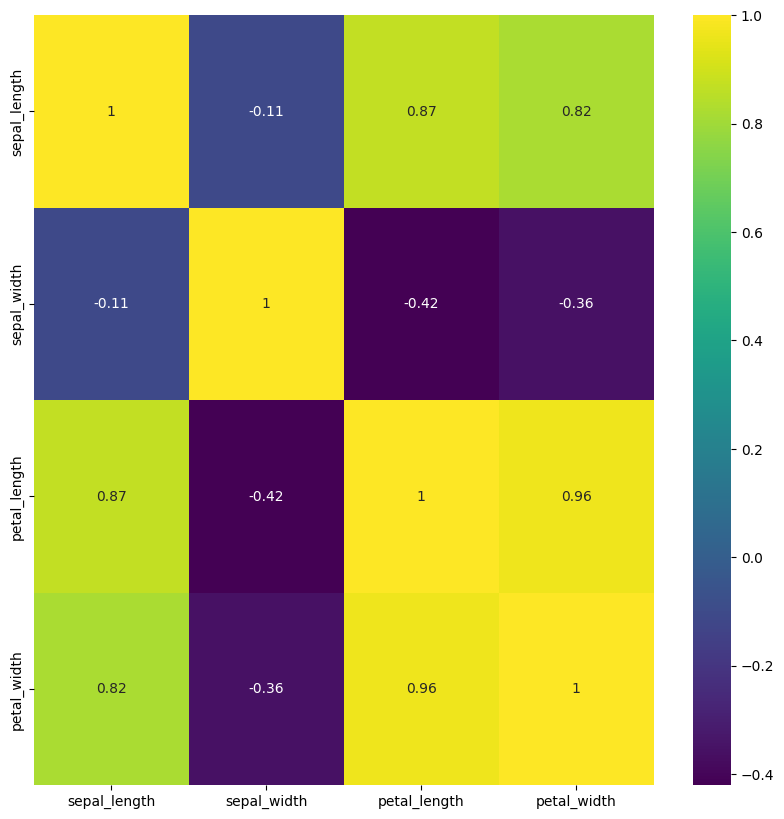

In [ ]:
plt.figure(figsize=(10,10))
corr=iris_data[['sepal_length','sepal_width','petal_length','petal_width']].corr()
sns.heatmap(corr,annot=True,cmap='viridis')

In [ ]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(iris_data[['petal_length','petal_width']])
    wcss1.append(kmeans.inertia_)

In [ ]:
wcss1

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 20.316007803485395,
 14.147293864755932,
 11.056639971910453,
 9.297130812538596,
 8.043872171477286,
 6.773348650891444,
 6.254273015873015]

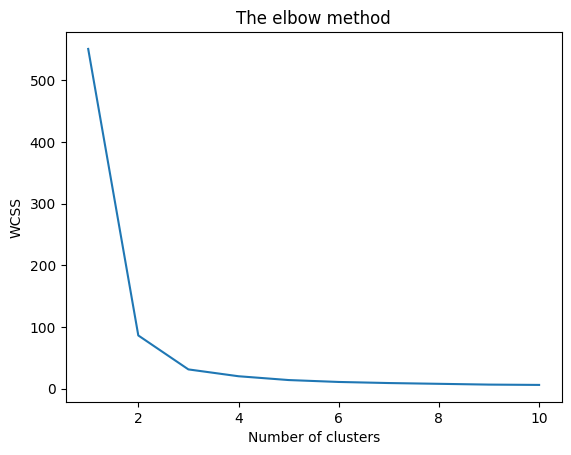

In [ ]:
# plotting the elbow curve
plt.plot(range(1, 11), wcss1)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [ ]:
kmeans1=KMeans(n_clusters=4,random_state=2)
y_pred=kmeans1.fit_predict(iris_data[['petal_length','petal_width']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
iris_data_with_cluster1=iris_data.copy()
iris_data_with_cluster1['cluster1']=y_pred
iris_data_with_cluster1

,sepal_length,sepal_width,petal_length,petal_width,species,cluster1
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


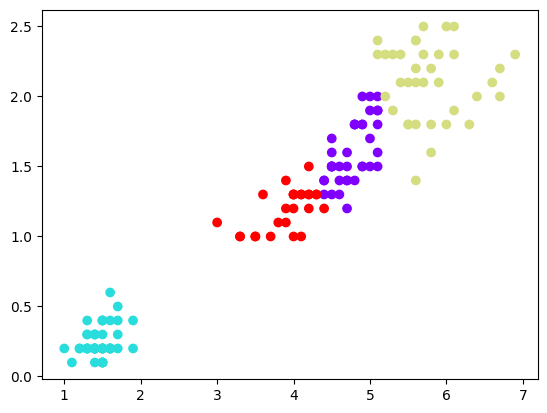

In [ ]:
plt.scatter(iris_data_with_cluster1['petal_length'],iris_data_with_cluster1['petal_width'],c=iris_data_with_cluster1['cluster1'],cmap='rainbow')


In [ ]:
centroids=kmeans1.cluster_centers_
centroids

array([[4.75789474, 1.59736842],
       [1.464     , 0.244     ],
       [5.78611111, 2.10833333],
       [3.90384615, 1.19230769]])

In [ ]:
iris_data_with_cluster1['species']=iris_data['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm1=confusion_matrix(iris_data_with_cluster1.species,iris_data_with_cluster1.cluster1)
cm1

array([[ 0, 50,  0,  0],
       [24,  0,  0, 26],
       [14,  0, 36,  0],
       [ 0,  0,  0,  0]])

In [ ]:
wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(iris_data[['sepal_length','sepal_width']])
    wcss2.append(kmeans.inertia_)

In [ ]:
wcss2

[130.18093333333334,
 57.99647879763822,
 37.1237021276596,
 28.509571540860733,
 24.286968292640555,
 17.516112899896804,
 14.628929179122284,
 15.347787887730345,
 12.659354830449459,
 12.055797831892459]

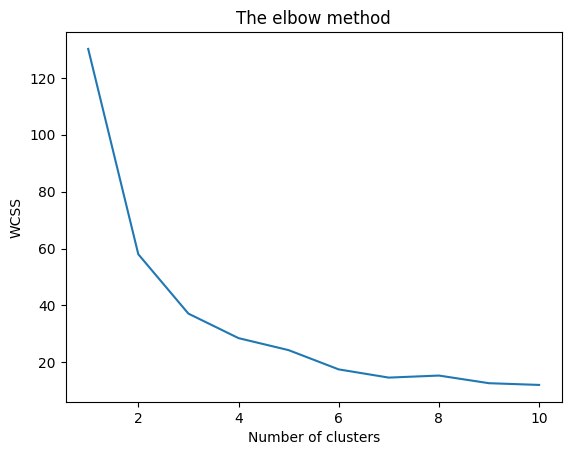

In [ ]:
# plotting the elbow curve
plt.plot(range(1, 11), wcss2)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [ ]:
kmeans2=KMeans(n_clusters=5,random_state=2)
y_pred1=kmeans2.fit_predict(iris_data[['sepal_length','sepal_width']])
y_pred1

array([3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 1, 4, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 4, 0, 0, 4, 1, 4, 0, 4,
       0, 0, 0, 2, 2, 0, 0, 4, 4, 2, 0, 2, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4,
       0, 0, 2, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [ ]:
iris_data_with_cluster2=iris_data.copy()
iris_data_with_cluster2['cluster2']=y_pred1
iris_data_with_cluster2

,sepal_length,sepal_width,petal_length,petal_width,species,cluster2
0,5.1,3.5,1.4,0.2,Iris-setosa,3
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,3
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


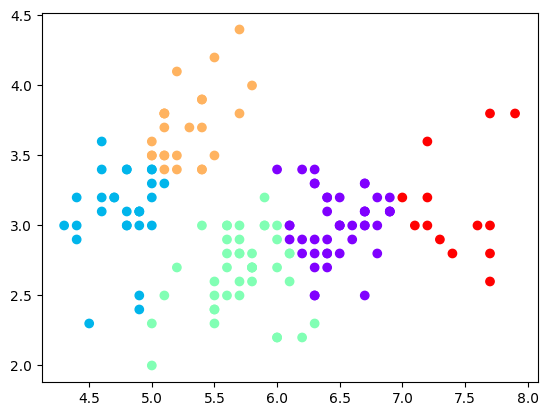

In [ ]:
plt.scatter(iris_data_with_cluster2['sepal_length'],iris_data_with_cluster2['sepal_width'],c=iris_data_with_cluster2['cluster2'],cmap='rainbow')

In [ ]:
centroids1=kmeans2.cluster_centers_
centroids1

array([[6.48636364, 3.00681818],
       [4.76071429, 3.1       ],
       [5.71463415, 2.66585366],
       [5.28333333, 3.70833333],
       [7.43846154, 3.13076923]])

CONFUSION MATRIX

In [ ]:
iris_data_with_cluster2['species']=iris_data['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [ ]:
iris_data_with_cluster2

,sepal_length,sepal_width,petal_length,petal_width,species,cluster2
0,5.1,3.5,1.4,0.2,0,3
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,3
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [ ]:
cm2=confusion_matrix(iris_data_with_cluster2.species,iris_data_with_cluster2.cluster2)
cm2

array([[ 0, 26,  0, 24,  0],
       [16,  1, 32,  0,  1],
       [28,  1,  9,  0, 12],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])